In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()
def sentiment_analysis(tweet):
    score = analyzer.polarity_scores(tweet)["compound"]
    return score

In [3]:
tweet_data=pd.read_csv('stock_tweets.csv')
tweet_data.head()

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [4]:
stock_data=pd.read_csv('stock_yfinance_data.csv')
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


In [5]:
stock_data["Date"] = pd.to_datetime(stock_data["Date"]).dt.strftime("%Y-%m-%d")
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


In [6]:
## checking if the timeframe of tweet and stock price data is same
print(f'last date of the tweet data {max(tweet_data.Date)}')
print(f'start date of the tweet data {min(tweet_data.Date)}')
print(f'last date of the stock data {max(stock_data.Date)}')
print(f'first date of the stock data {min(stock_data.Date)}')
print("Thus both stock price and tweet data available is in same time frame")

last date of the tweet data 2022-09-29 23:41:16+00:00
start date of the tweet data 2021-09-30 00:06:02+00:00
last date of the stock data 2022-09-29
first date of the stock data 2021-09-30
Thus both stock price and tweet data available is in same time frame


In [7]:
## let us add column to the stock price dataframe which shows the max stock price fluctuation
stock_data['Fluctuation'] = stock_data.High - stock_data.Low
## let us add column to the stock price dataframe which shows the net rise in stock price
stock_data['Price_Gain'] = stock_data.Close - stock_data.Open
## let us add column to the stock price dataframe which shows the total valuation at the end of the day
stock_data['Total_Valuation_EOD'] = stock_data.Volume * stock_data.Close

In [8]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,Fluctuation,Price_Gain,Total_Valuation_EOD
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,4.709991,-1.839996,1.392452e+10
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA,5.730011,-1.059998,1.320308e+10
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA,10.283325,-4.989990,2.382361e+10
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA,7.703308,-1.403351,1.438830e+10
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA,4.480011,2.183319,1.145382e+10


In [9]:
import re
tweet_data['Tweet'] = tweet_data.apply(lambda row: row['Tweet'].lower(),axis=1) #removed capitalisation
tweet_data['Tweet'] = tweet_data.apply(lambda row: re.sub("@[A-Za-z0-9_]+","", row['Tweet']),axis=1) #removed mentions
tweet_data['Tweet'] = tweet_data.apply(lambda row: re.sub("#[A-Za-z0-9_]+","", row['Tweet']),axis=1) #removed hashtags
tweet_data['Tweet'] = tweet_data.apply(lambda row: re.sub(r"http\S+","", row['Tweet']),axis=1) #removed websites
tweet_data['Tweet'] = tweet_data.apply(lambda row: re.sub(r"www.\S+","", row['Tweet']),axis=1)
tweet_data['Tweet'] = tweet_data.apply(lambda row: re.sub('[()!?]'," ", row['Tweet']),axis=1) #removed puncs
tweet_data['Tweet'] = tweet_data.apply(lambda row: re.sub('\[.*?\]'," ", row['Tweet']),axis=1) 
tweet_data['Tweet'] = tweet_data.apply(lambda row: re.sub("[^a-z]"," ", row['Tweet']),axis=1)

tweet_data[['Tweet']].head()

,Tweet
0,mainstream media has done an amazing job at br...
1,tesla delivery estimates are at around k fr...
2,even if i include m unvested rsus as of...
3,hahaha why are you still trying to stop tes...
4,stop trying to kill kids you sad deranged o...


In [10]:
tweet_data['Sentiment'] = tweet_data['Tweet'].apply(lambda x : sentiment_analysis(x))
tweet_data.head()

,Date,Tweet,Stock Name,Company Name,Sentiment
0,2022-09-29 23:41:16+00:00,mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772
1,2022-09-29 23:24:43+00:00,tesla delivery estimates are at around k fr...,TSLA,"Tesla, Inc.",0.0000
2,2022-09-29 23:18:08+00:00,even if i include m unvested rsus as of...,TSLA,"Tesla, Inc.",0.2960
3,2022-09-29 22:40:07+00:00,hahaha why are you still trying to stop tes...,TSLA,"Tesla, Inc.",-0.7096
4,2022-09-29 22:27:05+00:00,stop trying to kill kids you sad deranged o...,TSLA,"Tesla, Inc.",-0.8750


In [11]:
# Creating Anchor Column for tweet_data
tweet_data = tweet_data.assign(
    Date_string=tweet_data.Date.astype("str").str.split(" ").str[0],
    anchor=lambda x: x["Date_string"] + x["Stock Name"]
)

# Creating Anchor Column for stock_data
stock_data = stock_data.assign(
    Date_string=stock_data.Date.astype("str").str.split(" ").str[0],
    anchor=lambda x: x["Date_string"] + x["Stock Name"]
)

In [12]:
tweet_data.head()

,Date,Tweet,Stock Name,Company Name,Sentiment,Date_string,anchor
0,2022-09-29 23:41:16+00:00,mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772,2022-09-29,2022-09-29TSLA
1,2022-09-29 23:24:43+00:00,tesla delivery estimates are at around k fr...,TSLA,"Tesla, Inc.",0.0000,2022-09-29,2022-09-29TSLA
2,2022-09-29 23:18:08+00:00,even if i include m unvested rsus as of...,TSLA,"Tesla, Inc.",0.2960,2022-09-29,2022-09-29TSLA
3,2022-09-29 22:40:07+00:00,hahaha why are you still trying to stop tes...,TSLA,"Tesla, Inc.",-0.7096,2022-09-29,2022-09-29TSLA
4,2022-09-29 22:27:05+00:00,stop trying to kill kids you sad deranged o...,TSLA,"Tesla, Inc.",-0.8750,2022-09-29,2022-09-29TSLA


Positive Count: 42104
Negative Count: 16328
Zero Count: 22361


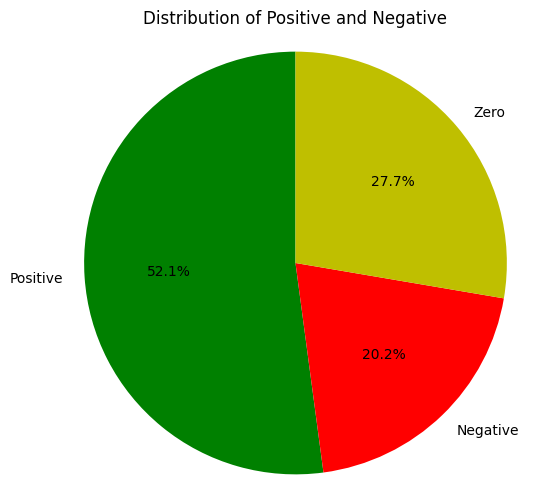

In [13]:
positive_count = (tweet_data['Sentiment'] > 0).sum()  # count positive values
negative_count = (tweet_data['Sentiment'] < 0).sum()  # count negative values
zero_count = (tweet_data['Sentiment'] == 0).sum()  # count zero values

# display counts
print("Positive Count:", positive_count)
print("Negative Count:", negative_count)
print("Zero Count:", zero_count)

labels = ['Positive', 'Negative' , 'Zero']
sizes = [positive_count, negative_count, zero_count]
colors = ['g', 'r', 'y' ]  

# pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Positive and Negative')
plt.show()

In [14]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,Fluctuation,Price_Gain,Total_Valuation_EOD,Date_string,anchor
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,4.709991,-1.839996,1.392452e+10,2021-09-30,2021-09-30TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA,5.730011,-1.059998,1.320308e+10,2021-10-01,2021-10-01TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA,10.283325,-4.989990,2.382361e+10,2021-10-04,2021-10-04TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA,7.703308,-1.403351,1.438830e+10,2021-10-05,2021-10-05TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA,4.480011,2.183319,1.145382e+10,2021-10-06,2021-10-06TSLA


In [15]:
# merging the two dataframe on the anchor
data = pd.merge(tweet_data, stock_data , on="anchor")
data.head()

,Date_x,Tweet,Stock Name_x,Company Name,Sentiment,Date_string_x,anchor,Date_y,Open,High,Low,Close,Adj Close,Volume,Stock Name_y,Fluctuation,Price_Gain,Total_Valuation_EOD,Date_string_y
0,2022-09-29 23:41:16+00:00,mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772,2022-09-29,2022-09-29TSLA,2022-09-29,282.76001,283.649994,265.779999,268.209991,268.209991,77620600,TSLA,17.869995,-14.550018,2.081862e+10,2022-09-29
1,2022-09-29 23:24:43+00:00,tesla delivery estimates are at around k fr...,TSLA,"Tesla, Inc.",0.0000,2022-09-29,2022-09-29TSLA,2022-09-29,282.76001,283.649994,265.779999,268.209991,268.209991,77620600,TSLA,17.869995,-14.550018,2.081862e+10,2022-09-29
2,2022-09-29 23:18:08+00:00,even if i include m unvested rsus as of...,TSLA,"Tesla, Inc.",0.2960,2022-09-29,2022-09-29TSLA,2022-09-29,282.76001,283.649994,265.779999,268.209991,268.209991,77620600,TSLA,17.869995,-14.550018,2.081862e+10,2022-09-29
3,2022-09-29 22:40:07+00:00,hahaha why are you still trying to stop tes...,TSLA,"Tesla, Inc.",-0.7096,2022-09-29,2022-09-29TSLA,2022-09-29,282.76001,283.649994,265.779999,268.209991,268.209991,77620600,TSLA,17.869995,-14.550018,2.081862e+10,2022-09-29
4,2022-09-29 22:27:05+00:00,stop trying to kill kids you sad deranged o...,TSLA,"Tesla, Inc.",-0.8750,2022-09-29,2022-09-29TSLA,2022-09-29,282.76001,283.649994,265.779999,268.209991,268.209991,77620600,TSLA,17.869995,-14.550018,2.081862e+10,2022-09-29


In [16]:
# let us convert the string date column "date_str_x" to datetime
data.Date_string_x = pd.to_datetime(data.Date_string_x)
# since we are aiming to see the impact of tweets on stock value (i.e. rise and fall), we can drop "neutral" sentiments
data = data[data.Sentiment != 0]
data.head()

,Date_x,Tweet,Stock Name_x,Company Name,Sentiment,Date_string_x,anchor,Date_y,Open,High,Low,Close,Adj Close,Volume,Stock Name_y,Fluctuation,Price_Gain,Total_Valuation_EOD,Date_string_y
0,2022-09-29 23:41:16+00:00,mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772,2022-09-29,2022-09-29TSLA,2022-09-29,282.76001,283.649994,265.779999,268.209991,268.209991,77620600,TSLA,17.869995,-14.550018,2.081862e+10,2022-09-29
2,2022-09-29 23:18:08+00:00,even if i include m unvested rsus as of...,TSLA,"Tesla, Inc.",0.2960,2022-09-29,2022-09-29TSLA,2022-09-29,282.76001,283.649994,265.779999,268.209991,268.209991,77620600,TSLA,17.869995,-14.550018,2.081862e+10,2022-09-29
3,2022-09-29 22:40:07+00:00,hahaha why are you still trying to stop tes...,TSLA,"Tesla, Inc.",-0.7096,2022-09-29,2022-09-29TSLA,2022-09-29,282.76001,283.649994,265.779999,268.209991,268.209991,77620600,TSLA,17.869995,-14.550018,2.081862e+10,2022-09-29
4,2022-09-29 22:27:05+00:00,stop trying to kill kids you sad deranged o...,TSLA,"Tesla, Inc.",-0.8750,2022-09-29,2022-09-29TSLA,2022-09-29,282.76001,283.649994,265.779999,268.209991,268.209991,77620600,TSLA,17.869995,-14.550018,2.081862e+10,2022-09-29
6,2022-09-29 22:24:22+00:00,for years viciously silenced critics failin...,TSLA,"Tesla, Inc.",-0.9325,2022-09-29,2022-09-29TSLA,2022-09-29,282.76001,283.649994,265.779999,268.209991,268.209991,77620600,TSLA,17.869995,-14.550018,2.081862e+10,2022-09-29


In [17]:
## only keeping the valuable data
preprocessed_data=data[
    [
        "Date_x",
        "Date_string_x",
        "Tweet",
        "Stock Name_x",
        "Company Name",
        "Sentiment",
        "Open",
        "High",
        "Low",
        "Close",
        "Volume",
        "Fluctuation",
        "Price_Gain",
        "Total_Valuation_EOD"
    ]
]
preprocessed_data = preprocessed_data.copy()
## counter is use to count number of positive and negative tweets per day 
## counter= daily tweet volume
preprocessed_data["counter"] = 1
preprocessed_data.head(5)

,Date_x,Date_string_x,Tweet,Stock Name_x,Company Name,Sentiment,Open,High,Low,Close,Volume,Fluctuation,Price_Gain,Total_Valuation_EOD,counter
0,2022-09-29 23:41:16+00:00,2022-09-29,mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772,282.76001,283.649994,265.779999,268.209991,77620600,17.869995,-14.550018,2.081862e+10,1
2,2022-09-29 23:18:08+00:00,2022-09-29,even if i include m unvested rsus as of...,TSLA,"Tesla, Inc.",0.2960,282.76001,283.649994,265.779999,268.209991,77620600,17.869995,-14.550018,2.081862e+10,1
3,2022-09-29 22:40:07+00:00,2022-09-29,hahaha why are you still trying to stop tes...,TSLA,"Tesla, Inc.",-0.7096,282.76001,283.649994,265.779999,268.209991,77620600,17.869995,-14.550018,2.081862e+10,1
4,2022-09-29 22:27:05+00:00,2022-09-29,stop trying to kill kids you sad deranged o...,TSLA,"Tesla, Inc.",-0.8750,282.76001,283.649994,265.779999,268.209991,77620600,17.869995,-14.550018,2.081862e+10,1
6,2022-09-29 22:24:22+00:00,2022-09-29,for years viciously silenced critics failin...,TSLA,"Tesla, Inc.",-0.9325,282.76001,283.649994,265.779999,268.209991,77620600,17.869995,-14.550018,2.081862e+10,1


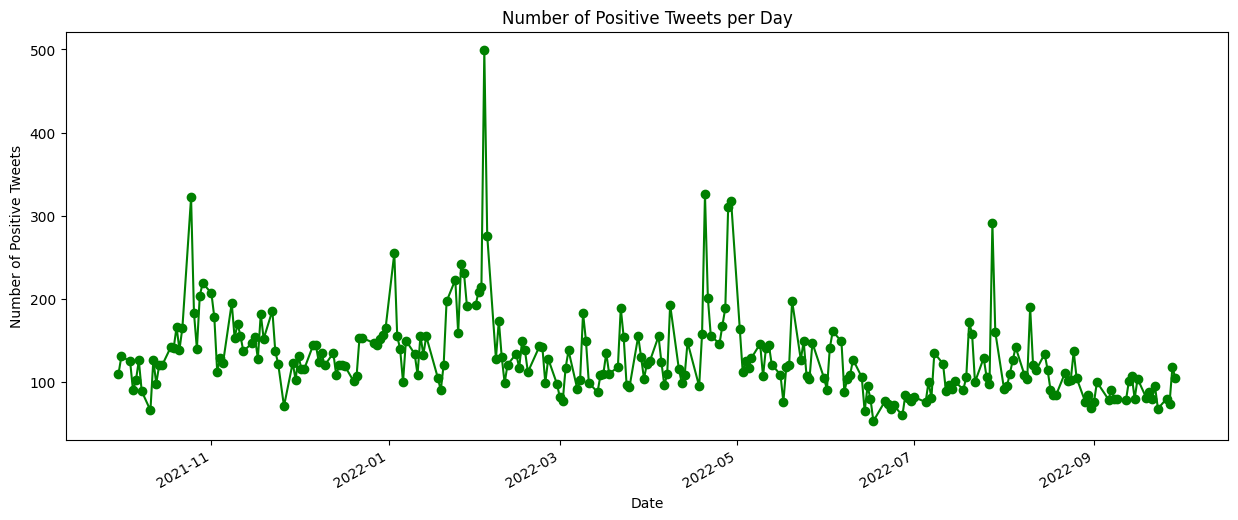

In [18]:
positive_tweets = preprocessed_data[preprocessed_data['Sentiment'] > 0]
positive_tweets_per_day = positive_tweets.groupby('Date_string_x').size()
plt.figure(figsize=(15, 6))
positive_tweets_per_day.plot(kind='line', marker='o', color='green')
plt.title('Number of Positive Tweets per Day')
plt.xlabel('Date')
plt.ylabel('Number of Positive Tweets')
plt.show()

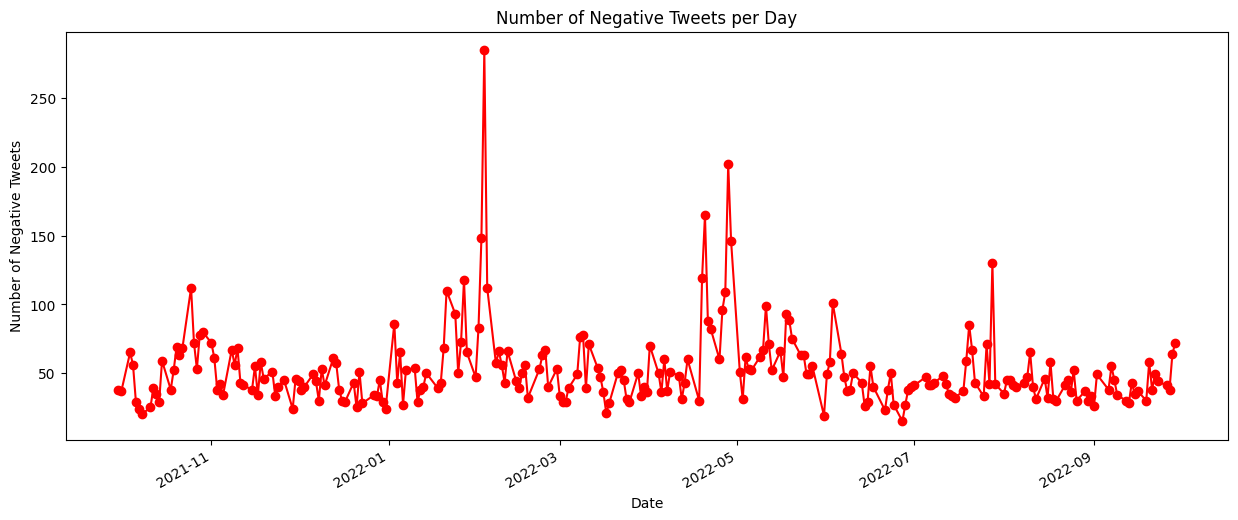

In [19]:
negative_tweets = preprocessed_data[preprocessed_data['Sentiment'] < 0]
negative_tweets_per_day = negative_tweets.groupby('Date_string_x').size()
plt.figure(figsize=(15, 6))
negative_tweets_per_day.plot(kind='line', marker='o', color='red')
plt.title('Number of Negative Tweets per Day')
plt.xlabel('Date')
plt.ylabel('Number of Negative Tweets')
plt.show()

In our dataset, we have total 25 companies, namely
Company Name
Tesla, Inc.                                           21698
Taiwan Semiconductor Manufacturing Company Limited     5232
Apple Inc.                                             2855
Procter & Gamble Company                               2582
Amazon.com, Inc.                                       2582
Microsoft Corporation                                  2582
Meta Platforms, Inc.                                   1681
NIO Inc.                                               1434
Advanced Micro Devices, Inc.                           1368
Netflix, Inc.                                          1048
Alphabet Inc.                                           748
PayPal Holdings, Inc.                                   493
The Walt Disney Company                                 327
Costco Wholesale Corporation                            202
The Boeing Company                                      193
Intel Corporation                   

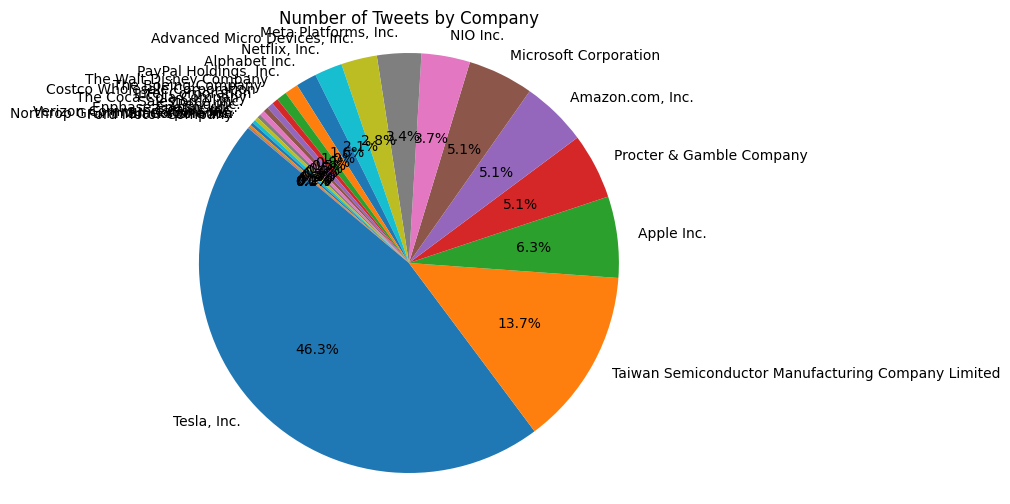

In [20]:
# Print number of companies and their tweet counts
print(
    f"In our dataset, we have total {len(preprocessed_data['Company Name'].value_counts())} companies, namely\n{preprocessed_data['Company Name'].value_counts()}"
)

# Pie chart of number of tweets by company
company_counts = tweet_data['Company Name'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(company_counts, labels=company_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of Tweets by Company')
plt.axis('equal')  
plt.show()


In [21]:
# Replace "Stock_Name_x" with the actual column name
tesla_df = preprocessed_data[preprocessed_data["Stock Name_x"] == "TSLA"]
taiwanSMC_df = preprocessed_data[preprocessed_data["Stock Name_x"] == "TSM"]
apple_df = preprocessed_data[preprocessed_data["Stock Name_x"] == "AAPL"]

In [22]:
# for simplicity, we will further form 2 sub dataframes per company based on the sentiments: positive and negative
pos_tesla_df = tesla_df[tesla_df.Sentiment > 0]
pos_taiwanSMC_df = taiwanSMC_df[taiwanSMC_df.Sentiment >0]
pos_apple_df = apple_df[apple_df.Sentiment > 0]

neg_tesla_df = tesla_df[tesla_df.Sentiment <0]
neg_taiwanSMC_df = taiwanSMC_df[taiwanSMC_df.Sentiment <0]
neg_apple_df = apple_df[apple_df.Sentiment <0]

In [23]:
# let us create dataset with limited values that give us a brief info about rise and fall in total valuation of the company over time
ovr_pos_tesla_df = pos_tesla_df.groupby(by=["Date_string_x","Fluctuation", "Price_Gain", "Total_Valuation_EOD","Sentiment"], as_index=False).agg({"counter":pd.Series.sum})
ovr_pos_taiwanSMC_df = pos_taiwanSMC_df.groupby(by=["Date_string_x","Fluctuation", "Price_Gain", "Total_Valuation_EOD","Sentiment"], as_index=False).agg({"counter":pd.Series.sum})
ovr_pos_apple_df = pos_apple_df.groupby(by=["Date_string_x","Fluctuation", "Price_Gain", "Total_Valuation_EOD","Sentiment"], as_index=False).agg({"counter":pd.Series.sum})

ovr_neg_tesla_df = neg_tesla_df.groupby(by=["Date_string_x","Fluctuation", "Price_Gain", "Total_Valuation_EOD","Sentiment"], as_index=False).agg({"counter":pd.Series.sum})
ovr_neg_taiwanSMC_df = neg_taiwanSMC_df.groupby(by=["Date_string_x","Fluctuation", "Price_Gain", "Total_Valuation_EOD","Sentiment"], as_index=False).agg({"counter":pd.Series.sum})
ovr_neg_apple_df = neg_apple_df.groupby(by=["Date_string_x","Fluctuation", "Price_Gain", "Total_Valuation_EOD","Sentiment"], as_index=False).agg({"counter":pd.Series.sum})

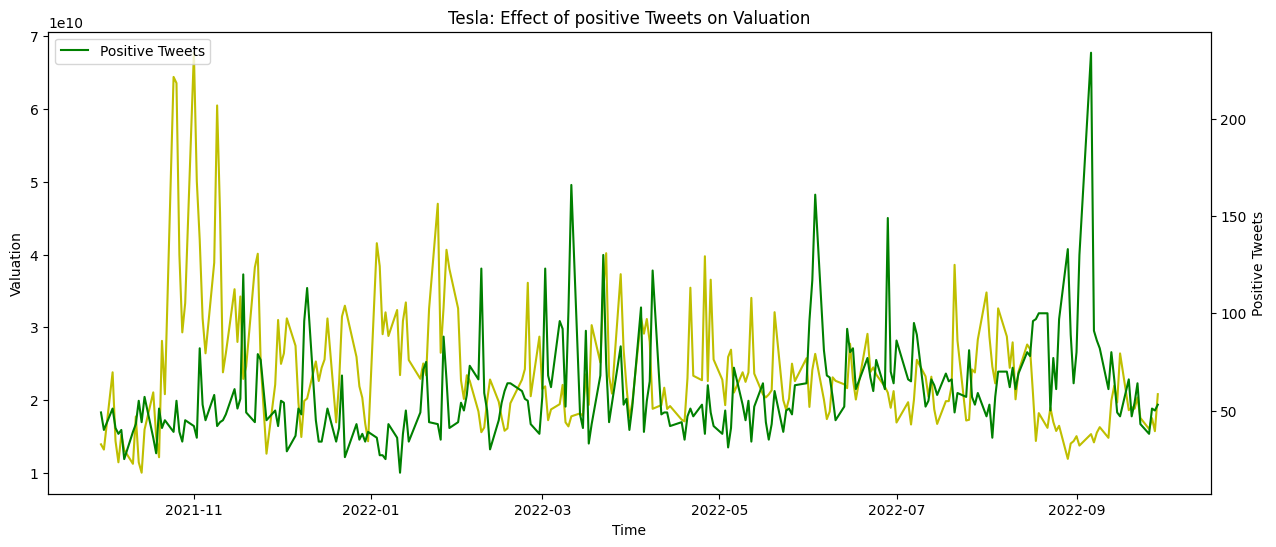

In [24]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(15, 6))
plt.title("Tesla: Effect of positive Tweets on Valuation")
ax1 = plt.gca()
ax2 = plt.twinx()


ax1.plot(
    pos_tesla_df.Date_string_x,
    pos_tesla_df.Total_Valuation_EOD,
    color="y",
    label="Valuation",
)


positive_tweets = tesla_df[tesla_df['Sentiment'] > 0]
positive_tweets_per_day = positive_tweets.groupby('Date_string_x').size()


ax2.plot(
    pos_tesla_df.Date_string_x.unique(),
    positive_tweets_per_day,
    color="g",
    label="Positive Tweets",
)

ax1.set_xlabel("Time")
ax1.set_ylabel("Valuation")
ax2.set_ylabel("Positive Tweets")

plt.legend()
plt.show()

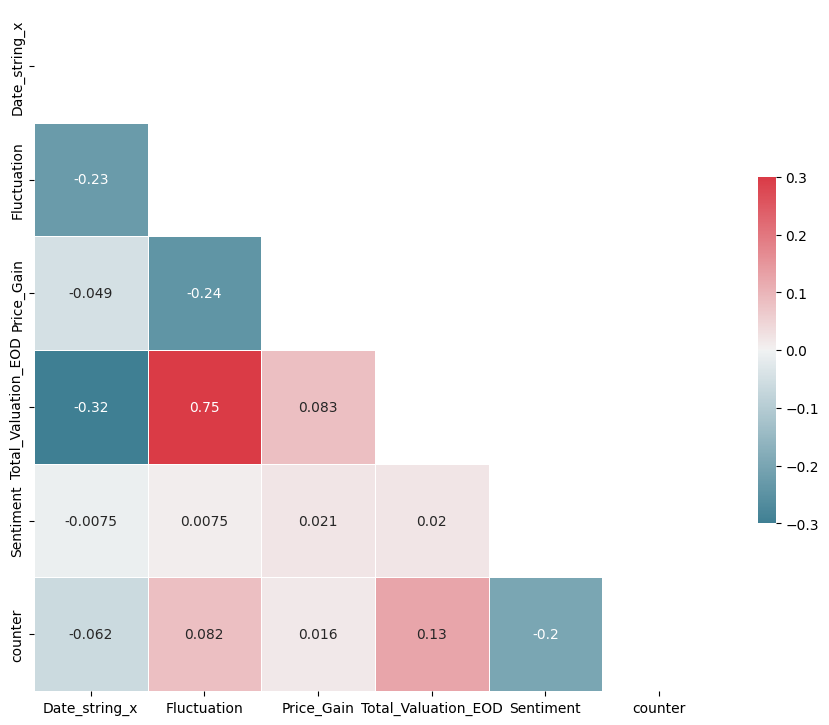

In [25]:
# Correlation matrix
corr = ovr_pos_tesla_df.corr()

# Creating a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)  # Use 'bool' instead of 'np.bool'
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    annot=True,       # Annotates cells with correlation coefficients
    vmax=.3,          # Maximum color bar value
    vmin=-.3,         # Minimum color bar value
    center=0,         # Center of the colormap
    square=True,      # Enforce square cells
    linewidths=.5,    # Line width between cells
    cbar_kws={"shrink": .5}  # Shrink the color bar
)

# Show the plot
plt.show()


C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


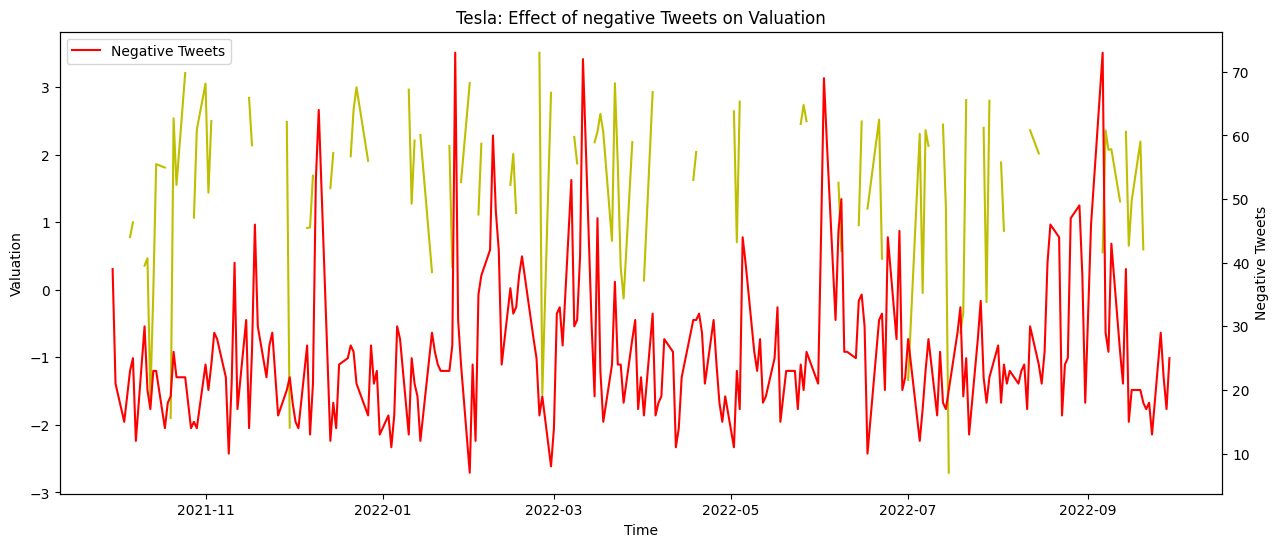

In [26]:
plt.figure(figsize=(15, 6))
plt.title("Tesla: Effect of negative Tweets on Valuation")
ax1 = plt.gca()
ax2 = plt.twinx()


ax1.plot(
    neg_tesla_df.Date_string_x,
    np.log(neg_tesla_df.Price_Gain),    
    color="y",
    label="Valuation",
)


negative_tweets = tesla_df[tesla_df['Sentiment'] < 0]
negative_tweets_per_day = negative_tweets.groupby('Date_string_x').size()


ax2.plot(
    neg_tesla_df.Date_string_x.unique(),
    negative_tweets_per_day,
    color="r",
    label="Negative Tweets",
)

ax1.set_xlabel("Time")
ax1.set_ylabel("Valuation")
ax2.set_ylabel("Negative Tweets")

plt.legend()
plt.show()

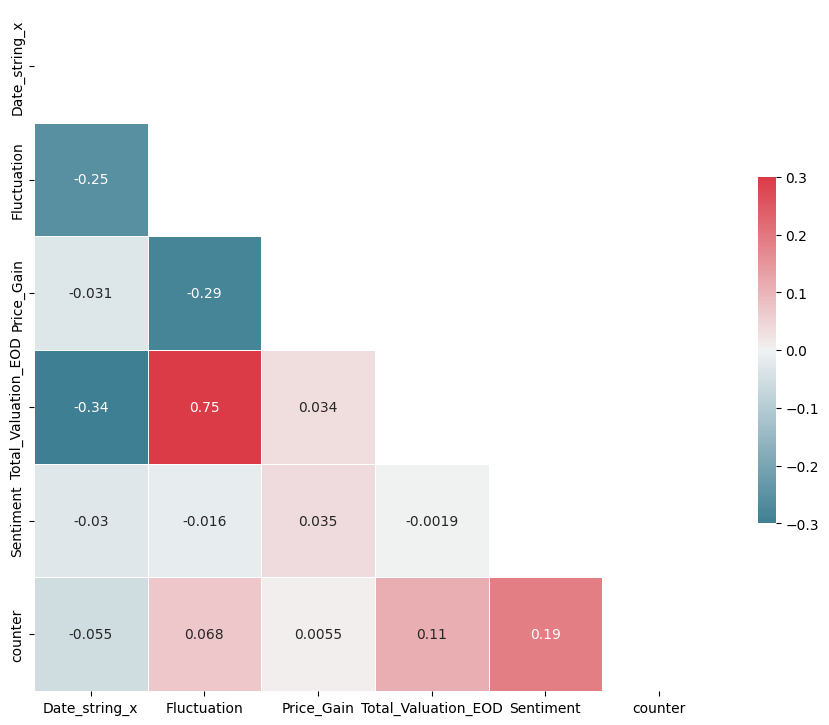

In [27]:
# Correlation matrix
corr = ovr_neg_tesla_df.corr()

# Creating a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)  # Use 'bool' instead of 'np.bool'
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    annot=True,       # Annotates cells with correlation coefficients
    vmax=.3,          # Maximum value for the color bar
    vmin=-.3,         # Minimum value for the color bar
    center=0,         # Center of the colormap
    square=True,      # Enforce square cells
    linewidths=.5,    # Line width between cells
    cbar_kws={"shrink": .5}  # Shrink the color bar
)

# Show the plot
plt.show()


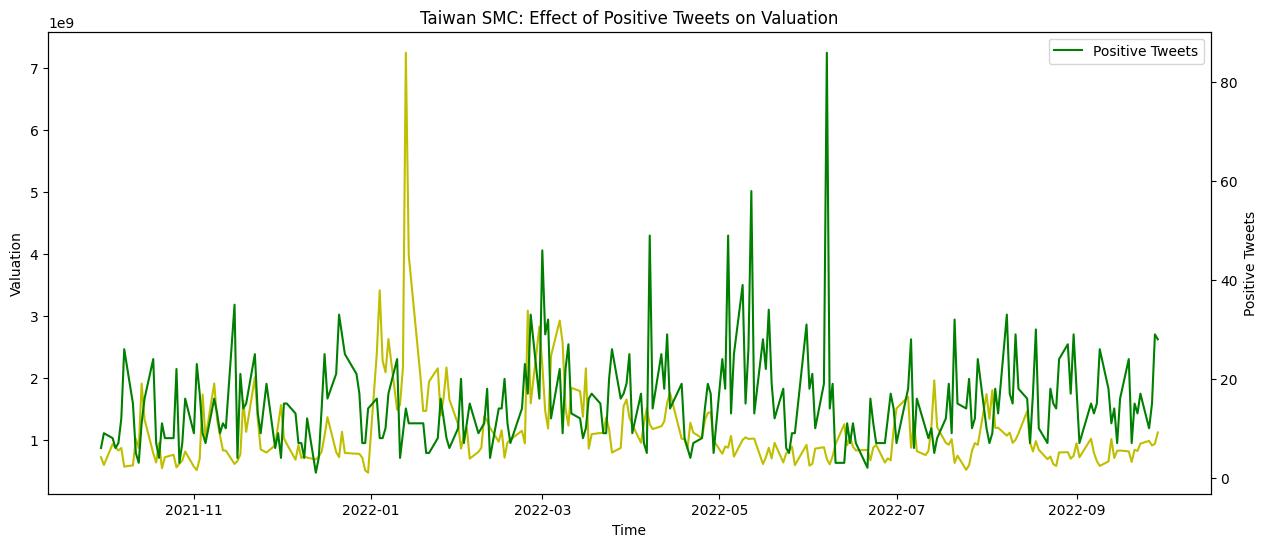

In [28]:
plt.figure(figsize=(15, 6))
plt.title("Taiwan SMC: Effect of Positive Tweets on Valuation")
ax1 = plt.gca()
ax2 = plt.twinx()


ax1.plot(
    pos_taiwanSMC_df.Date_string_x,
    pos_taiwanSMC_df.Total_Valuation_EOD,
    color="y",
    label="Valuation",
)


positive_tweets = taiwanSMC_df[taiwanSMC_df['Sentiment'] >0]
positive_tweets_per_day = positive_tweets.groupby('Date_string_x').size()


ax2.plot(
    pos_taiwanSMC_df.Date_string_x.unique(),
    positive_tweets_per_day,
    color="g",
    label="Positive Tweets",
)

ax1.set_xlabel("Time")
ax1.set_ylabel("Valuation")
ax2.set_ylabel("Positive Tweets")

plt.legend()
plt.show()

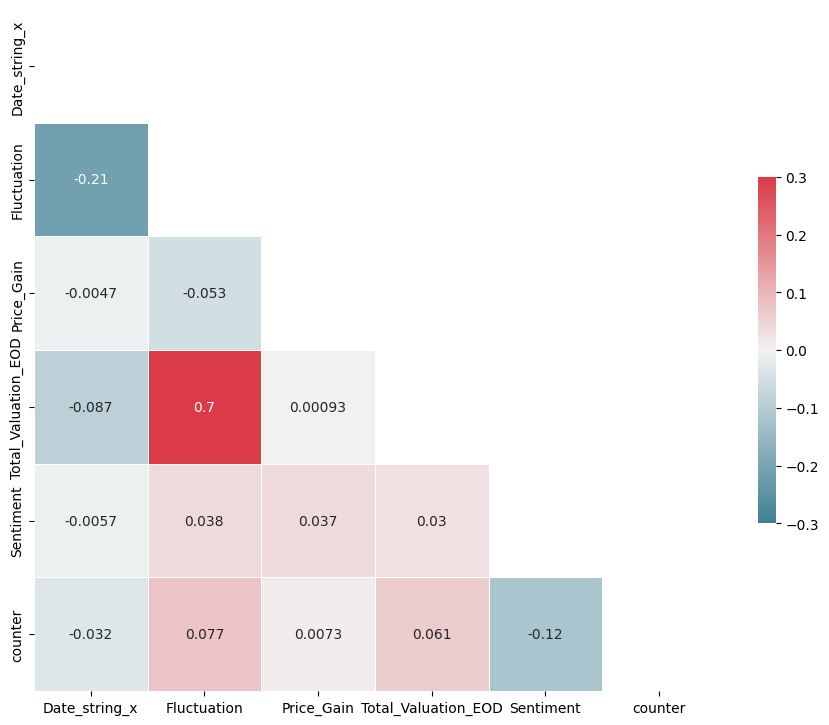

In [29]:
# Correlation matrix
corr = ovr_pos_taiwanSMC_df.corr()

# Creating a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)  # Use 'bool' instead of 'np.bool'
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    annot=True,       # Annotate cells with correlation coefficients
    vmax=.3,          # Maximum value for the color bar
    vmin=-.3,         # Minimum value for the color bar
    center=0,         # Center of the colormap
    square=True,      # Enforce square cells
    linewidths=.5,    # Line width between cells
    cbar_kws={"shrink": .5}  # Shrink the color bar
)

# Show the plot
plt.show()


C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


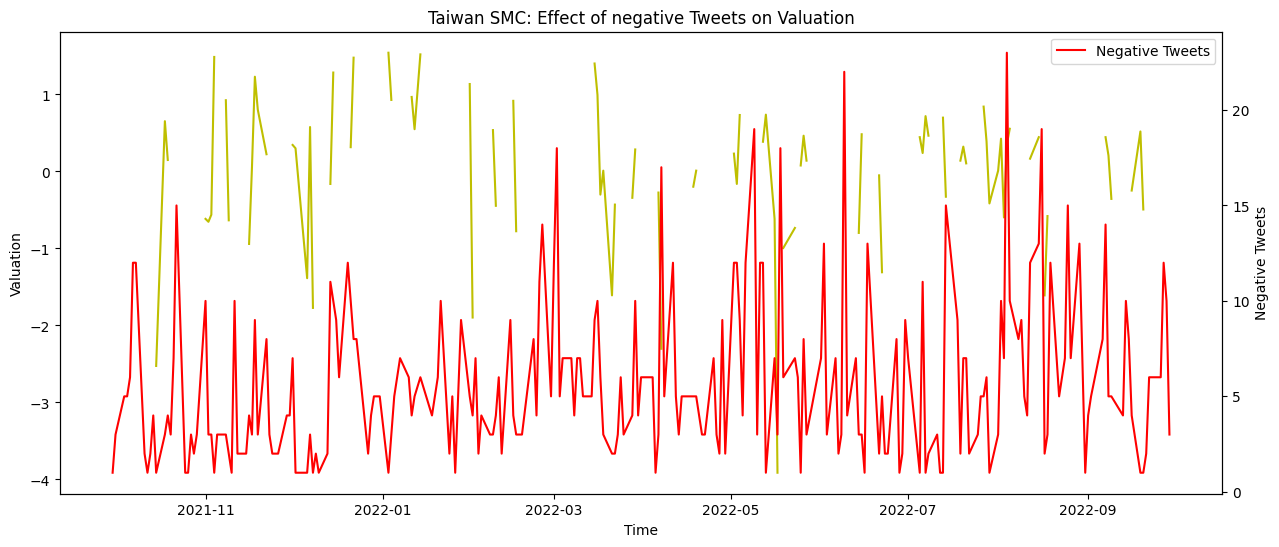

In [30]:
plt.figure(figsize=(15, 6))
plt.title("Taiwan SMC: Effect of negative Tweets on Valuation")
ax1 = plt.gca()
ax2 = plt.twinx()


ax1.plot(
    neg_taiwanSMC_df.Date_string_x,
    np.log(neg_taiwanSMC_df.Price_Gain),    
    color="y",
    label="Valuation",
)


negative_tweets = taiwanSMC_df[taiwanSMC_df['Sentiment'] <0]
negative_tweets_per_day = negative_tweets.groupby('Date_string_x').size()


ax2.plot(
    neg_taiwanSMC_df.Date_string_x.unique(),
    negative_tweets_per_day,
    color="r",
    label="Negative Tweets",
)

ax1.set_xlabel("Time")
ax1.set_ylabel("Valuation")
ax2.set_ylabel("Negative Tweets")

plt.legend()
plt.show()

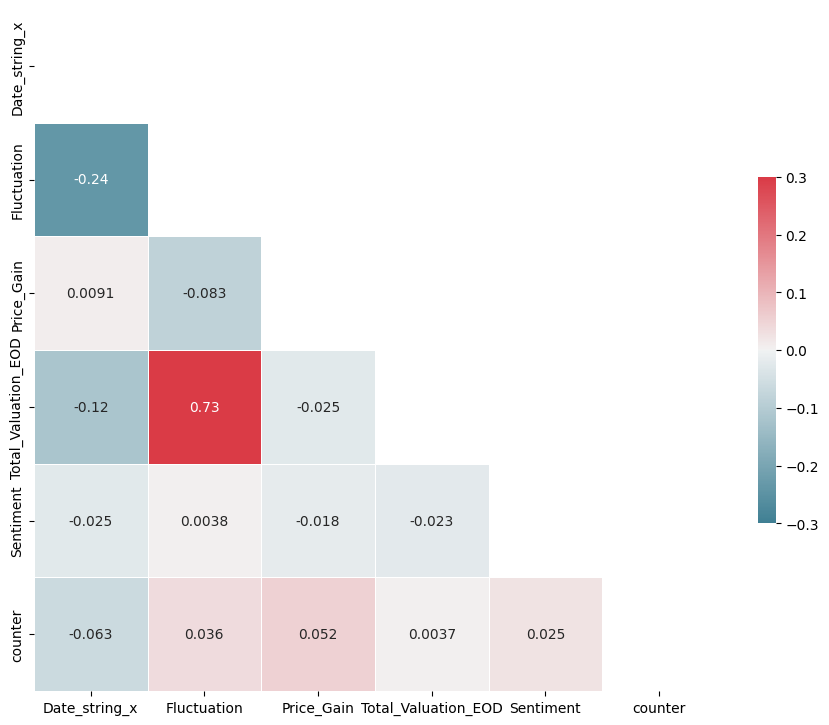

In [31]:
# Correlation matrix
corr = ovr_neg_taiwanSMC_df.corr()

# Creating a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)  # Use 'bool' instead of 'np.bool'
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    annot=True,       # Annotate cells with correlation coefficients
    vmax=.3,          # Maximum value for the color bar
    vmin=-.3,         # Minimum value for the color bar
    center=0,         # Center of the colormap
    square=True,      # Enforce square cells
    linewidths=.5,    # Line width between cells
    cbar_kws={"shrink": .5}  # Shrink the color bar
)

# Show the plot
plt.show()


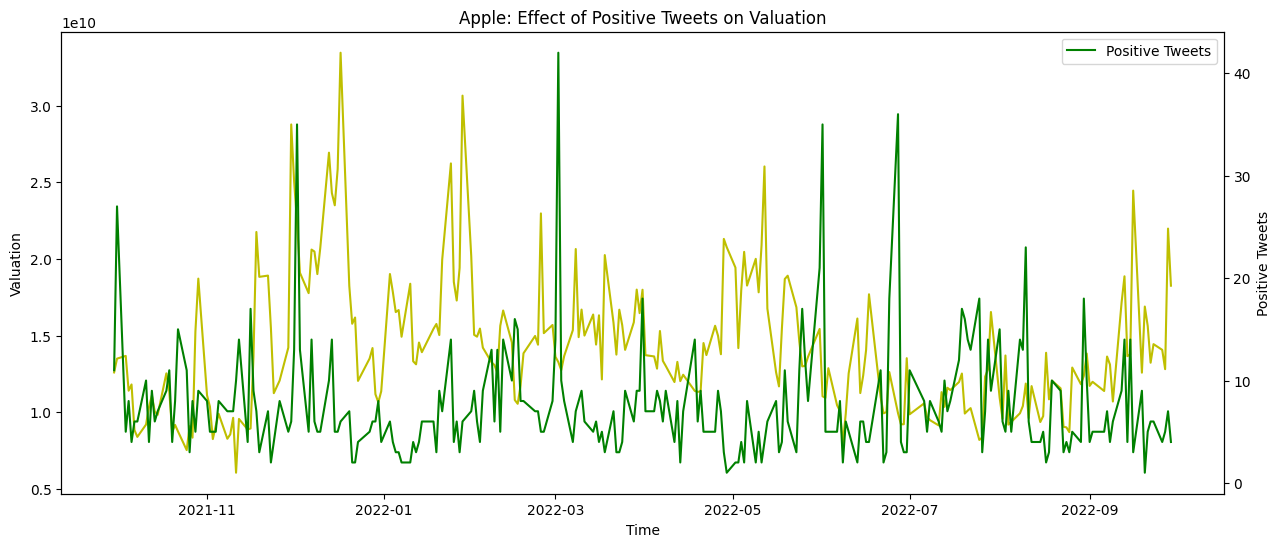

In [32]:
plt.figure(figsize=(15, 6))
plt.title("Apple: Effect of Positive Tweets on Valuation")
ax1 = plt.gca()
ax2 = plt.twinx()


ax1.plot(
    pos_apple_df.Date_string_x,
    pos_apple_df.Total_Valuation_EOD,
    color="y",
    label="Valuation",
)

positive_tweets = apple_df[apple_df['Sentiment'] > 0]
positive_tweets_per_day = positive_tweets.groupby('Date_string_x').size()


ax2.plot(
    pos_apple_df.Date_string_x.unique(),
    positive_tweets_per_day,
    color="g",
    label="Positive Tweets",
)

ax1.set_xlabel("Time")
ax1.set_ylabel("Valuation")
ax2.set_ylabel("Positive Tweets")

plt.legend()
plt.show()


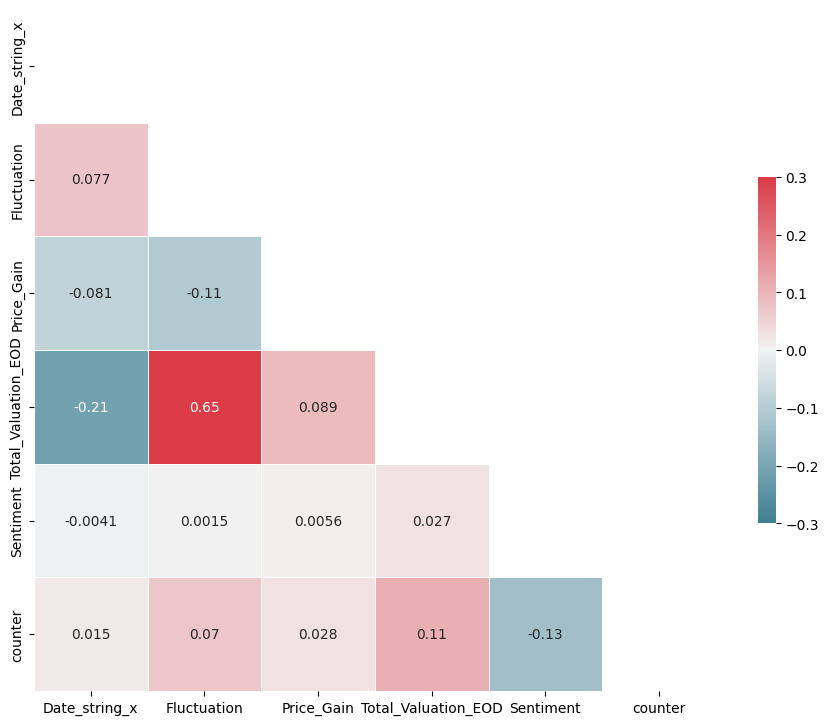

In [33]:
# Correlation matrix
corr = ovr_pos_apple_df.corr()

# Creating a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)  # Use 'bool' instead of 'np.bool'
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    annot=True,       # Annotate cells with correlation coefficients
    vmax=.3,          # Maximum value for the color bar
    vmin=-.3,         # Minimum value for the color bar
    center=0,         # Center of the colormap
    square=True,      # Enforce square cells
    linewidths=.5,    # Line width between cells
    cbar_kws={"shrink": .5}  # Shrink the color bar
)

# Show the plot
plt.show()


C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


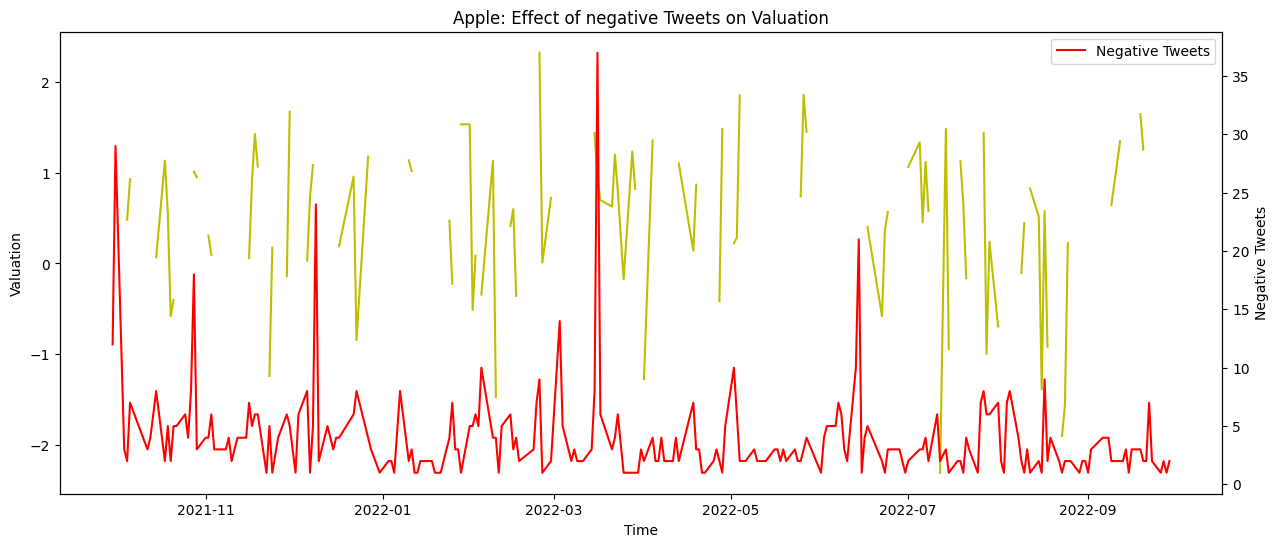

In [34]:
plt.figure(figsize=(15, 6))
plt.title("Apple: Effect of negative Tweets on Valuation")
ax1 = plt.gca()
ax2 = plt.twinx()


ax1.plot(
    neg_apple_df.Date_string_x,
    np.log(neg_apple_df.Price_Gain),    
    color="y",
    label="Valuation",
)


negative_tweets = apple_df[apple_df['Sentiment'] < 0]
negative_tweets_per_day = negative_tweets.groupby('Date_string_x').size()


ax2.plot(
    neg_apple_df.Date_string_x.unique(),
    negative_tweets_per_day,
    color="r",
    label="Negative Tweets",
)

ax1.set_xlabel("Time")
ax1.set_ylabel("Valuation")
ax2.set_ylabel("Negative Tweets")

plt.legend()
plt.show()

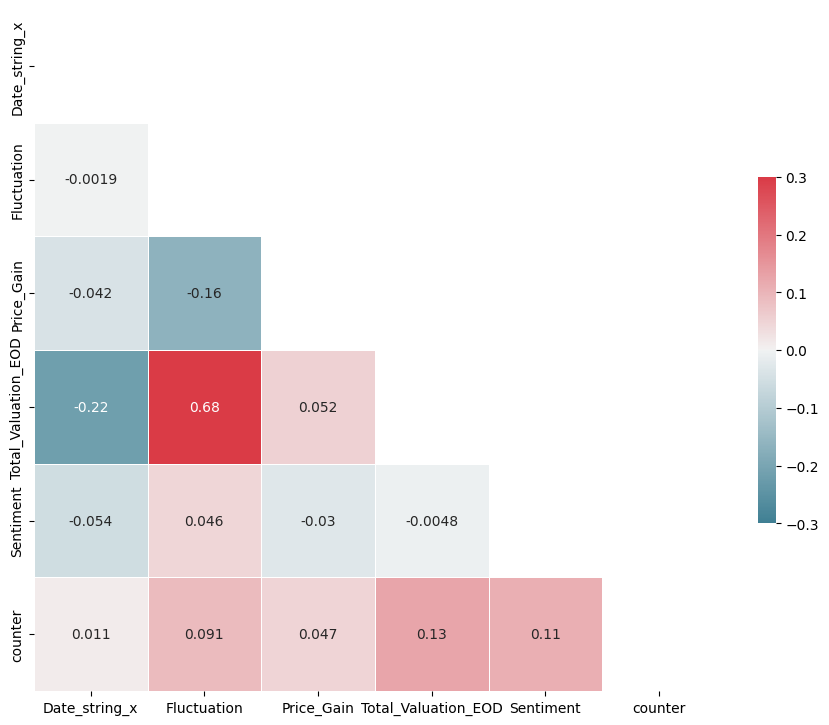

In [35]:
# Correlation matrix
corr = ovr_neg_apple_df.corr()

# Create a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)  # Use 'bool' instead of 'np.bool'
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    annot=True,       # Annotate cells with correlation coefficients
    vmax=.3,          # Maximum value for the color bar
    vmin=-.3,         # Minimum value for the color bar
    center=0,         # Center of the colormap
    square=True,      # Enforce square cells
    linewidths=.5,    # Line width between cells
    cbar_kws={"shrink": .5}  # Shrink the color bar
)

# Show the plot
plt.show()


In [36]:
## importing libraries
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
tesla=tesla_df
drop=['Date_x','Stock Name_x','Company Name','Sentiment','Open','High','Low','Volume','Fluctuation','Price_Gain','Total_Valuation_EOD']
tesla.drop(columns=drop, inplace=True)
tesla

C:\Users\HP\AppData\Local\Temp\ipykernel_43756\235051115.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla.drop(columns=drop, inplace=True)


,Date_string_x,Tweet,Close,counter
0,2022-09-29,mainstream media has done an amazing job at br...,268.209991,1
2,2022-09-29,even if i include m unvested rsus as of...,268.209991,1
3,2022-09-29,hahaha why are you still trying to stop tes...,268.209991,1
4,2022-09-29,stop trying to kill kids you sad deranged o...,268.209991,1
6,2022-09-29,for years viciously silenced critics failin...,268.209991,1
...,...,...,...,...
30021,2021-09-30,if humans could tell the difference between li...,258.493347,1
30023,2021-09-30,playing in the dirt and,258.493347,1
30024,2021-09-30,i agree with that tsla s ev business alone ...,258.493347,1
30026,2021-09-30,get ready for a tsla q delivery...,258.493347,1


In [37]:
def get_sentiment_scores(tweet):
    scores = analyzer.polarity_scores(tweet)
    return scores

tesla['Sentiment_Scores'] = tesla['Tweet'].apply(get_sentiment_scores)
tesla[['Positive', 'Neutral', 'Negative', 'Compound']] = tesla['Sentiment_Scores'].apply(pd.Series)
tesla

C:\Users\HP\AppData\Local\Temp\ipykernel_43756\900420656.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla['Sentiment_Scores'] = tesla['Tweet'].apply(get_sentiment_scores)
C:\Users\HP\AppData\Local\Temp\ipykernel_43756\900420656.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla[['Positive', 'Neutral', 'Negative', 'Compound']] = tesla['Sentiment_Scores'].apply(pd.Series)
C:\Users\HP\AppData\Local\Temp\ipykernel_43756\900420656.py:6: SettingWithCopyWarning: 
A value is trying to be set on a co

,Date_string_x,Tweet,Close,counter,Sentiment_Scores,Positive,Neutral,Negative,Compound
0,2022-09-29,mainstream media has done an amazing job at br...,268.209991,1,"{'neg': 0.129, 'neu': 0.754, 'pos': 0.117, 'co...",0.129,0.754,0.117,0.0772
2,2022-09-29,even if i include m unvested rsus as of...,268.209991,1,"{'neg': 0.0, 'neu': 0.937, 'pos': 0.062, 'comp...",0.000,0.937,0.062,0.2960
3,2022-09-29,hahaha why are you still trying to stop tes...,268.209991,1,"{'neg': 0.282, 'neu': 0.569, 'pos': 0.148, 'co...",0.282,0.569,0.148,-0.7096
4,2022-09-29,stop trying to kill kids you sad deranged o...,268.209991,1,"{'neg': 0.588, 'neu': 0.412, 'pos': 0.0, 'comp...",0.588,0.412,0.000,-0.8750
6,2022-09-29,for years viciously silenced critics failin...,268.209991,1,"{'neg': 0.343, 'neu': 0.609, 'pos': 0.048, 'co...",0.343,0.609,0.048,-0.9325
...,...,...,...,...,...,...,...,...,...
30021,2021-09-30,if humans could tell the difference between li...,258.493347,1,"{'neg': 0.102, 'neu': 0.641, 'pos': 0.257, 'co...",0.102,0.641,0.257,0.9051
30023,2021-09-30,playing in the dirt and,258.493347,1,"{'neg': 0.333, 'neu': 0.417, 'pos': 0.25, 'com...",0.333,0.417,0.250,-0.1531
30024,2021-09-30,i agree with that tsla s ev business alone ...,258.493347,1,"{'neg': 0.084, 'neu': 0.691, 'pos': 0.225, 'co...",0.084,0.691,0.225,0.7003
30026,2021-09-30,get ready for a tsla q delivery...,258.493347,1,"{'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'comp...",0.000,0.703,0.297,0.4215


In [38]:
tesla['Sentiment']=tesla['Compound']
drop=['Sentiment_Scores','Positive','Neutral','Negative','Compound','Tweet']
tesla.drop(columns=drop, inplace=True)
tesla

C:\Users\HP\AppData\Local\Temp\ipykernel_43756\1092523194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla['Sentiment']=tesla['Compound']
C:\Users\HP\AppData\Local\Temp\ipykernel_43756\1092523194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla.drop(columns=drop, inplace=True)


,Date_string_x,Close,counter,Sentiment
0,2022-09-29,268.209991,1,0.0772
2,2022-09-29,268.209991,1,0.2960
3,2022-09-29,268.209991,1,-0.7096
4,2022-09-29,268.209991,1,-0.8750
6,2022-09-29,268.209991,1,-0.9325
...,...,...,...,...
30021,2021-09-30,258.493347,1,0.9051
30023,2021-09-30,258.493347,1,-0.1531
30024,2021-09-30,258.493347,1,0.7003
30026,2021-09-30,258.493347,1,0.4215


In [39]:
tesla2=tesla

tesla2['Date'] = pd.to_datetime(tesla2['Date_string_x']).dt.date  

# grouping by date, calculate mean sentiment and count number of tweets
final = tesla2.groupby('Date').agg({
    'Sentiment': 'mean',  
    'Date_string_x': 'count',        
    'Close': 'last'  
}).reset_index()
final.columns = ['Date', 'Mean_Sentiment', 'Num_Tweets', 'Close']
print(final)

           Date  Mean_Sentiment  Num_Tweets       Close
0    2021-09-30        0.239379          78  258.493347
1    2021-10-01        0.324948          67  258.406677
2    2021-10-04        0.186501          73  260.510010
3    2021-10-05        0.107410          67  260.196655
4    2021-10-06        0.304770          56  260.916656
..          ...             ...         ...         ...
247  2022-09-23        0.190059          61  275.329987
248  2022-09-26        0.234525          60  276.010010
249  2022-09-27        0.254294          66  282.940002
250  2022-09-28        0.179411          61  287.809998
251  2022-09-29        0.072040          88  268.209991

[252 rows x 4 columns]


C:\Users\HP\AppData\Local\Temp\ipykernel_43756\3852014809.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla2['Date'] = pd.to_datetime(tesla2['Date_string_x']).dt.date


In [40]:
## predicting closing value of stock based on a 3 day window of previous closing prices, sentiments, and number of tweets
def window_data(df, window, feature_col_number1, feature_col_number2, feature_col_number3, target_col_number):
    # creating empty lists "X_close", "X_sentiment", "X_ts" and y
    X_close = []
    X_sentiment = []
    X_ts = []
    y = []
    for i in range(len(df) - window):
        
        close = df.iloc[i:(i + window), feature_col_number1]
        ts_sentiment = df.iloc[i:(i + window), feature_col_number2]
        tw_vol = df.iloc[i:(i + window), feature_col_number3]
        target = df.iloc[(i + window), target_col_number]
        
        X_close.append(close)
        X_sentiment.append(ts_sentiment)
        X_ts.append(tw_vol)
        y.append(target)
        
    return np.hstack((X_close,X_sentiment,X_ts)), np.array(y).reshape(-1, 1)

In [41]:
window_size = 3
# column index 3 is the `Close` column
# column index 1 is the `Mean_Sentiment` column
# column index 2 is the `Num_tweets` column
feature_col_number1 = 3
feature_col_number2 = 1
feature_col_number3 = 2
target_col_number = 3
X, y = window_data(final, window_size, feature_col_number1, feature_col_number2, feature_col_number3, target_col_number)
print(X)

[[258.49334717 258.40667725 260.51000977 ...  78.          67.
   73.        ]
 [258.40667725 260.51000977 260.19665527 ...  67.          73.
   67.        ]
 [260.51000977 260.19665527 260.91665649 ...  73.          67.
   56.        ]
 ...
 [288.58999634 275.32998657 276.01000977 ...  65.          61.
   60.        ]
 [275.32998657 276.01000977 282.94000244 ...  61.          60.
   66.        ]
 [276.01000977 282.94000244 287.80999756 ...  60.          66.
   61.        ]]


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=21)

In [43]:
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import r2_score
model = svm.SVR()
# Fit the model
model.fit(X_train, y_train.ravel())
print(model.score(X_test,y_test))

0.4099491812617764


In [44]:
y_pred = model.predict(X_test)
print(y_pred)
print(r2_score(y_test, y_pred))

[280.72886908 294.92110445 292.93569052 282.0181357  292.86460465
 303.97070718 286.86134089 284.31335929 285.60009892 290.21754177
 304.66247114 313.3934574  281.5828034  318.49091114 300.00631368
 312.64323609 282.24107255 300.57006722 294.85538145 320.09791686
 311.61486415 301.57250105 296.6354356  292.95519162 293.95443748]
0.4099491812617764


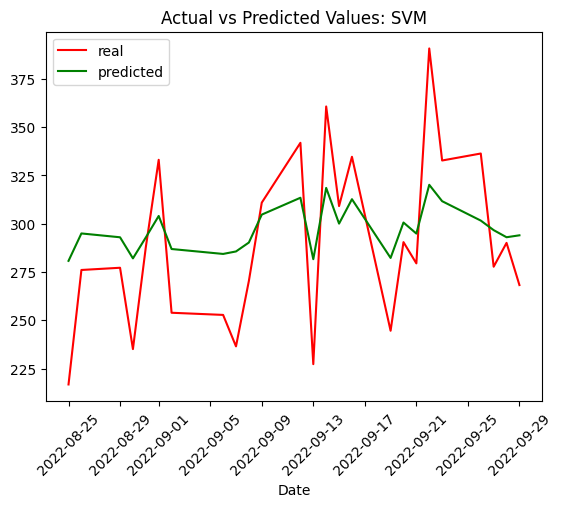

In [45]:
predicted_prices = y_pred.reshape(-1, 1)
real_prices = y_test.reshape(-1, 1)
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
})
stocks['Date'] = final['Date'][-len(real_prices):].reset_index(drop=True)  

stocks.set_index('Date', inplace=True)  
stocks.head()

plt.plot(stocks['Real'], color='r', label='real')
plt.plot(stocks['Predicted'], color='g', label='predicted')
plt.title("Actual vs Predicted Values: SVM")
plt.xlabel('Date')
plt.legend()
plt.xticks(rotation=45)

plt.show()

In [46]:

real_values = stocks['Real'].values
predicted_values = stocks['Predicted'].values

real_slopes = np.diff(real_values)  
real_slopes = np.insert(real_slopes, 0, 0)  

predicted_slopes = np.diff(predicted_values)  
predicted_slopes = np.insert(predicted_slopes, 0, 0)

In [47]:
real_slope_signs = np.sign(real_slopes)

predicted_slope_signs = np.sign(predicted_slopes)

In [48]:
matching_signs = (real_slope_signs == predicted_slope_signs)

accuracy = np.mean(matching_signs) * 100
print(f"Accuracy of slope sign comparison: {accuracy}%")

Accuracy of slope sign comparison: 80.0%


In [49]:
tesla = tweet_data[tweet_data['Stock Name'] == 'TSLA']

In [50]:
tesla = tesla[tesla['Sentiment'] != 0]

In [51]:
tesla = tesla.drop(columns=['anchor', 'Date', 'Company Name'], axis=1)

In [52]:
tesla.head()

,Tweet,Stock Name,Sentiment,Date_string
0,mainstream media has done an amazing job at br...,TSLA,0.0772,2022-09-29
2,even if i include m unvested rsus as of...,TSLA,0.2960,2022-09-29
3,hahaha why are you still trying to stop tes...,TSLA,-0.7096,2022-09-29
4,stop trying to kill kids you sad deranged o...,TSLA,-0.8750,2022-09-29
6,for years viciously silenced critics failin...,TSLA,-0.9325,2022-09-29


In [53]:
dates = tesla['Date_string'].unique()
average = {}
for i in dates:
    filtered_date = tesla[tesla['Date_string'] == i]
    average_value = filtered_date['Sentiment'].mean()
    average[i] = average_value
tesla_f = pd.DataFrame(list(average.items()), columns=['Date', 'Sentiment'])

In [54]:
tesla_f

,Date,Sentiment
0,2022-09-29,0.072040
1,2022-09-28,0.179411
2,2022-09-27,0.254294
3,2022-09-26,0.234525
4,2022-09-25,0.180717
...,...,...
360,2021-10-04,0.186501
361,2021-10-03,0.370178
362,2021-10-02,0.389431
363,2021-10-01,0.324948


In [55]:
tesla_stock = stock_data[stock_data['Stock Name'] == 'TSLA']
stock_f = tesla_stock.drop(columns=['anchor', 'Date_string', 'Open', 'High', 'Low', 'Adj Close', 'Volume', 'Stock Name', 'Fluctuation', 'Price_Gain', 'Total_Valuation_EOD'], axis=1)
stock_f.head()

,Date,Close
0,2021-09-30,258.493347
1,2021-10-01,258.406677
2,2021-10-04,260.510010
3,2021-10-05,260.196655
4,2021-10-06,260.916656


In [56]:
tesla_p = pd.merge(tesla_f, stock_f, on='Date', how='inner')

In [57]:
tesla_p['Close_1'] = tesla_p['Close']
tesla_p['Close_2'] = tesla_p['Close']
tesla_p['Close_3'] = tesla_p['Close']

In [58]:
tesla_p['Close_1'] = tesla_p['Close'].shift(1)
tesla_p['Close_2'] = tesla_p['Close'].shift(2)
tesla_p['Close_3'] = tesla_p['Close'].shift(3)

In [59]:
tesla_p = tesla_p.drop(0)

In [60]:
tesla_p = tesla_p.drop(1)

In [61]:
tesla_p = tesla_p.drop(2)

tesla_d = tesla_p

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


X = tesla_p[['Sentiment', 'Close_1', 'Close_2', 'Close_3']]  # using sentiment as the feature
y = tesla_p['Close']      # predicting the closing price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# model training
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.9376625054255422

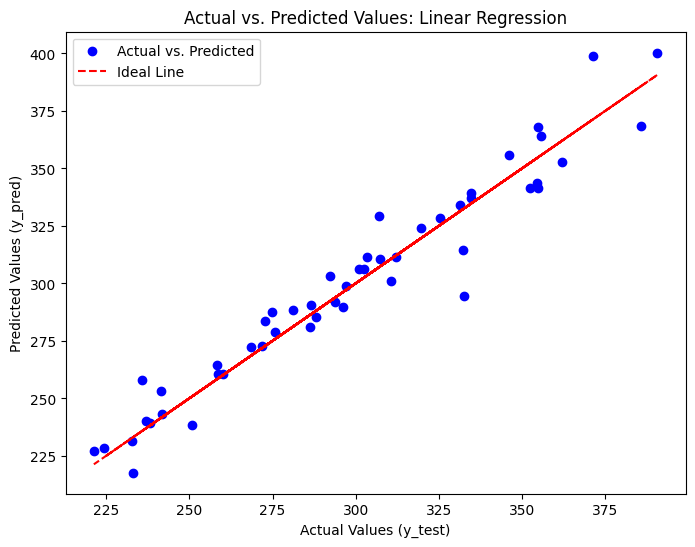

In [63]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs. Predicted Values: Linear Regression')
plt.legend()
plt.show()

In [64]:
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
X = tesla_p[['Sentiment', 'Close_1', 'Close_2', 'Close_3']]
y = tesla_p['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# building the ANN model
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # for regression - no activation function 
model.compile(optimizer='adam', loss='mean_squared_error')  
# model training
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=1)

y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

Epoch 1/1000


C:\Users\HP\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 70309.5469  
Epoch 2/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31569.4258 
Epoch 3/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10191.8125 
Epoch 4/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1836.0012 
Epoch 5/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 304.5143 
Epoch 6/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 764.9210 
Epoch 7/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 808.3964 
Epoch 8/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 441.2003 
Epoch 9/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 271.2175 
Epoch 10/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 267.1160 
Epoch 11/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 300.3206 
Epoch 12/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 276.9176 
Epoch 13/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 245.1385 
Epoch 14/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 270.7162 
Epoch 15/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/st

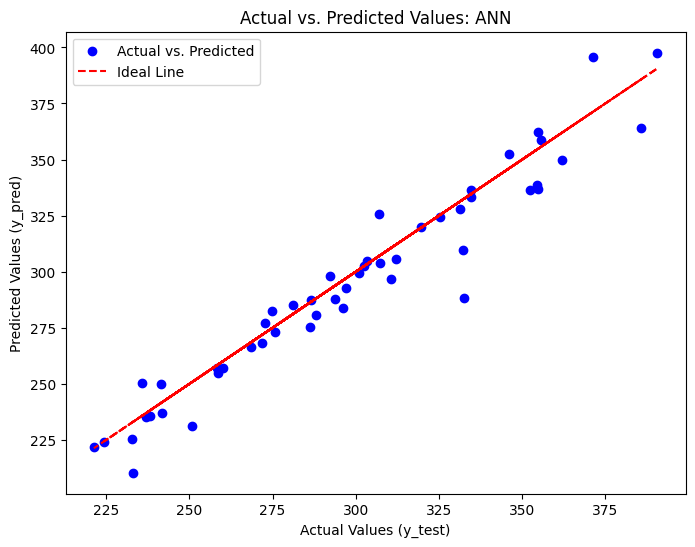

In [65]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs. Predicted Values: ANN')
plt.legend()
plt.show()

In [66]:
from sklearn.metrics import accuracy_score
# resetting index to avoid out of index error
tesla_p=tesla_p.reset_index()
X = tesla_p[['Sentiment', 'Close_1', 'Close_2', 'Close_3']]  # features
y = tesla_p['Close']  # target variable (regression)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
threshold_values = tesla_p['Close_1']

# convert regression target variable to binary classes based on the threshold
y_train_class = (y_train > threshold_values.iloc[y_train.index]).astype(int)
y_test_class = (y_test > threshold_values.iloc[y_test.index]).astype(int)
# model training
model = LinearRegression()
model.fit(X_train, y_train_class)
y_pred_class = (model.predict(X_test) > threshold_values.iloc[y_test.index]).astype(int)
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Accuracy: {accuracy}")

Accuracy: 0.64


In [67]:
X = tesla_p[['Sentiment', 'Close_1', 'Close_2', 'Close_3']]  # features
y = tesla_p['Close']  # target variable (regression)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Setting previous day's closing as the classification target
threshold_values = tesla_p['Close_1']
y_train_class = (y_train > threshold_values.iloc[y_train.index]).astype(int)
y_test_class = (y_test > threshold_values.iloc[y_test.index]).astype(int)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ANN model building
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# model training
model.fit(X_train, y_train_class, epochs=50, batch_size=32, validation_data=(X_test, y_test_class))

loss, accuracy = model.evaluate(X_test, y_test_class)
print(f"Accuracy: {accuracy}")

Epoch 1/50


C:\Users\HP\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.4874 - loss: 0.7008 - val_accuracy: 0.6200 - val_loss: 0.6759
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4778 - loss: 0.6941 - val_accuracy: 0.6000 - val_loss: 0.6784
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6031 - loss: 0.6853 - val_accuracy: 0.6000 - val_loss: 0.6774
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6171 - loss: 0.6820 - val_accuracy: 0.5600 - val_loss: 0.6755
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5401 - loss: 0.6901 - val_accuracy: 0.5800 - val_loss: 0.6726
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5945 - loss: 0.6783 - val_accuracy: 0.5600 - val_loss: 0.6770
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5658 - loss: 0.6761 - val_accuracy: 0.5400 - val_loss: 0.6791
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6225 - loss: 0.6748 - val_accuracy: 0.5800 - val_loss: 0.6741
Epoch 9/50
